<a href="https://colab.research.google.com/github/maxkleiner/maXbox4/blob/master/sentimenttree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Tree Classifier

In [9]:
# use a preclassifier dtree with high recall and then a second 
# classifier SVC to sort false positives out!
# use SVC as classifier and dtree to plot decision

from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#https://ritza.co/showcase/repl.it/introduction-to-machine-learning-with-python-and-repl-it.html

positive_texts = [
    "we love you",
    "they love us",
    "you are good",
    "he is good",
    "they love max"
]

negative_texts =  [
    "we hate you",
    "they hate us",
    "you are bad",
    "he is bad",
    "we hate max"
]

test_texts = [
    "they love bad max",   # this is labeled as positive !
    "they are good",
    "why do you hate mary",
    "they are almost always good",
    "we are very bad"
]

print('testset: ',test_texts)

training_texts = negative_texts + positive_texts
training_labels = ["neg"] * len(negative_texts) + ["pos"] * len(positive_texts)
#print(training_labels)

#mapping the words to numbers (bag of words)
vectorizer = CountVectorizer()
vectorizer.fit(training_texts)
print('vocabulary: ',vectorizer.vocabulary_)

#vectorizer.fit(test_texts)
#print(vectorizer.vocabulary_)

#You can join all lines and then use split: 
print('unique words:',set(" ".join(test_texts).split()))
#print(set([wo for line in test_texts for wo in line.split()]))

training_vectors = vectorizer.transform(training_texts)
testing_vectors = vectorizer.transform(test_texts)

classifier = tree.DecisionTreeClassifier()
classifier.fit(training_vectors, training_labels)
predictions = classifier.predict(testing_vectors)
print('predict: ',predictions)
#print('testset: ',test_texts)

#http://www.webgraphviz.com/
tree.export_graphviz(
    classifier,
    out_file='maxtree.dot',
    feature_names=vectorizer.get_feature_names(),
)



# Create a linear SVM classifier
clf = svm.SVC(kernel='linear')
# Train & learn classifier
clf.fit(training_vectors, training_labels)

# Make predictions on unseen test data
clf_predictions = clf.predict(testing_vectors)
print('predict SVC: ',clf_predictions)
test_labels=['pos','pos','neg','pos','neg']
print("Accuracy: {}%".format(clf.score(testing_vectors,test_labels)*100))

y_test = test_labels
y_pred = clf_predictions

print('actual:',y_test)
print('predic:',y_pred)

print('confusion matrix - classification report \n')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

testset:  ['they love bad max', 'they are good', 'why do you hate mary', 'they are almost always good', 'we are very bad']
vocabulary:  {'we': 10, 'hate': 3, 'you': 11, 'they': 8, 'us': 9, 'are': 0, 'bad': 1, 'he': 4, 'is': 5, 'max': 7, 'love': 6, 'good': 2}
unique words: {'love', 'good', 'max', 'are', 'mary', 'almost', 'very', 'you', 'bad', 'hate', 'we', 'always', 'they', 'why', 'do'}
predict:  ['pos' 'pos' 'neg' 'pos' 'neg']
predict SVC:  ['neg' 'pos' 'neg' 'pos' 'neg']
Accuracy: 80.0%
actual: ['pos', 'pos', 'neg', 'pos', 'neg']
predic: ['neg' 'pos' 'neg' 'pos' 'neg']
confusion matrix - classification report 

[[2 0]
 [1 2]]
              precision    recall  f1-score   support

         neg       0.67      1.00      0.80         2
         pos       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



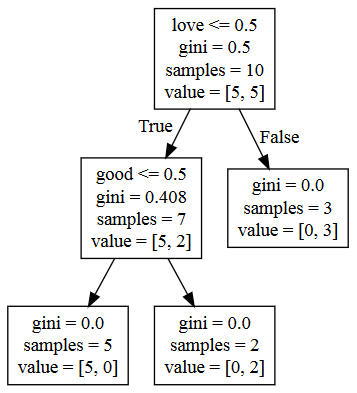

Because love or hate has 3 counts as discriminator in training set its easier than good and bad with 2 ocurrences.


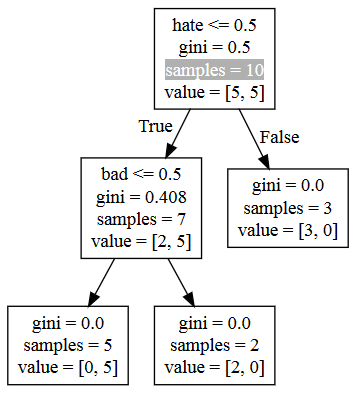

# Sentiment Tree Classifier with Support Vector Machine and Decision Tree Graph